In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries loaded")


✅ Libraries loaded


In [18]:
# Load cleaned data
df = pd.read_csv('../../data/cleaned/cleaned_data.csv')

print(f"Dataset: {len(df):,} students")
print(f"Columns: {len(df.columns)}")


Dataset: 22,836 students
Columns: 184


/var/folders/lb/krrh_r5s019_7l1b3vn7n7gc0000gn/T/ipykernel_4011/1880785953.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/cleaned/cleaned_data.csv')


In [19]:
# Key variables
summary_vars = ['Q15', 'Q16', 'capabilities_score', 'ethics_concerns_score', 'attitudes_score']

# Generate summary
summary_stats = df[summary_vars].describe().T
summary_stats['missing'] = df[summary_vars].isna().sum()
summary_stats['missing_pct'] = (summary_stats['missing'] / len(df)) * 100

# Rename for clarity
summary_stats.index = ['Trust (Q15)', 'Recommendation (Q16)', 'Capabilities', 
                        'Ethical Concerns', 'Attitudes']

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(summary_stats.round(2))


SUMMARY STATISTICS
                        count  mean  std  min  25%  50%  75%  max  missing  \
Trust (Q15)          19587.00  2.78 1.14 1.00 2.00 3.00 4.00 5.00     3249   
Recommendation (Q16) 19594.00  3.89 0.73 1.00 3.00 4.00 4.00 5.00     3242   
Capabilities         18032.00  2.98 0.86 1.00 2.40 3.00 3.60 5.00     4804   
Ethical Concerns     16313.00  3.34 0.74 1.00 3.00 3.33 3.89 5.00     6523   
Attitudes            18033.00  3.35 0.85 1.00 3.00 3.25 4.00 5.00     4803   

                      missing_pct  
Trust (Q15)                 14.23  
Recommendation (Q16)        14.20  
Capabilities                21.04  
Ethical Concerns            28.56  
Attitudes                   21.03  


In [20]:
# Save
output_dir = Path('../../results/tables')
output_dir.mkdir(parents=True, exist_ok=True)
summary_stats.to_csv(output_dir / 'summary_statistics.csv')
print("✅ Saved to results/tables/summary_statistics.csv")

✅ Saved to results/tables/summary_statistics.csv


In [21]:
# Usage distribution
usage_dist = df['usage_label'].value_counts()
usage_pct = (usage_dist / len(df)) * 100

usage_summary = pd.DataFrame({
    'Count': usage_dist,
    'Percentage': usage_pct
})

print("\nUsage Frequency:")
print(usage_summary)

usage_summary.to_csv(output_dir / 'usage_distribution.csv')


Usage Frequency:
             Count  Percentage
usage_label                   
Daily        17570       76.94
Weekly        4058       17.77
Monthly        757        3.31


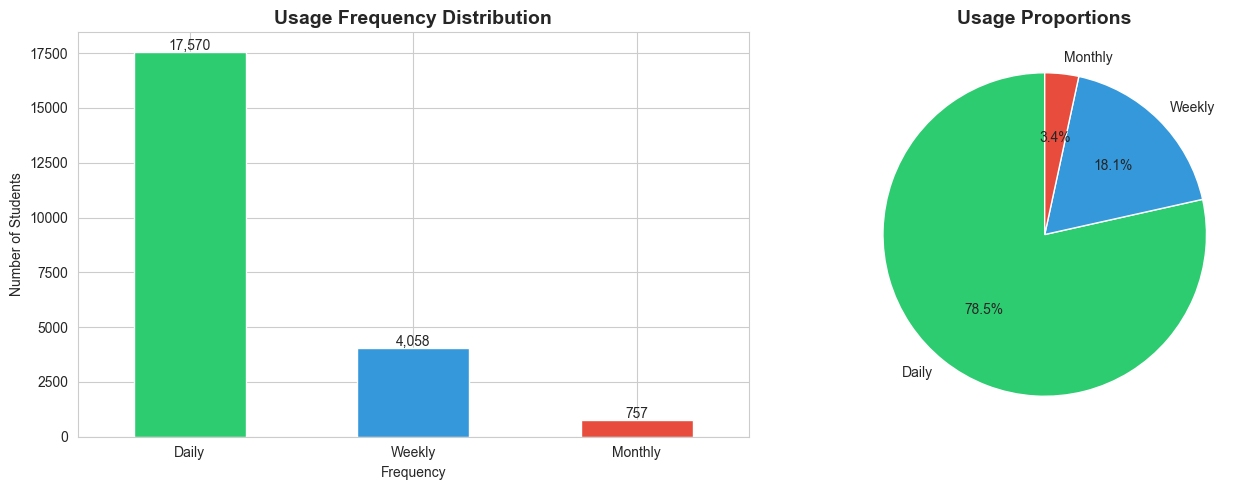

✅ Saved to results/figures/usage_distribution.png


In [22]:
# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
usage_dist.plot(kind='bar', ax=ax1, color=['#2ecc71', '#3498db', '#e74c3c'])
ax1.set_title('Usage Frequency Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Number of Students')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

for i, v in enumerate(usage_dist.values):
    ax1.text(i, v + 100, f'{v:,}', ha='center', fontsize=10)

# Pie chart
ax2.pie(usage_dist.values, labels=usage_dist.index, autopct='%1.1f%%',
        colors=['#2ecc71', '#3498db', '#e74c3c'], startangle=90)
ax2.set_title('Usage Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()

fig_dir = Path('../../results/figures')
fig_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(fig_dir / 'usage_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved to results/figures/usage_distribution.png")

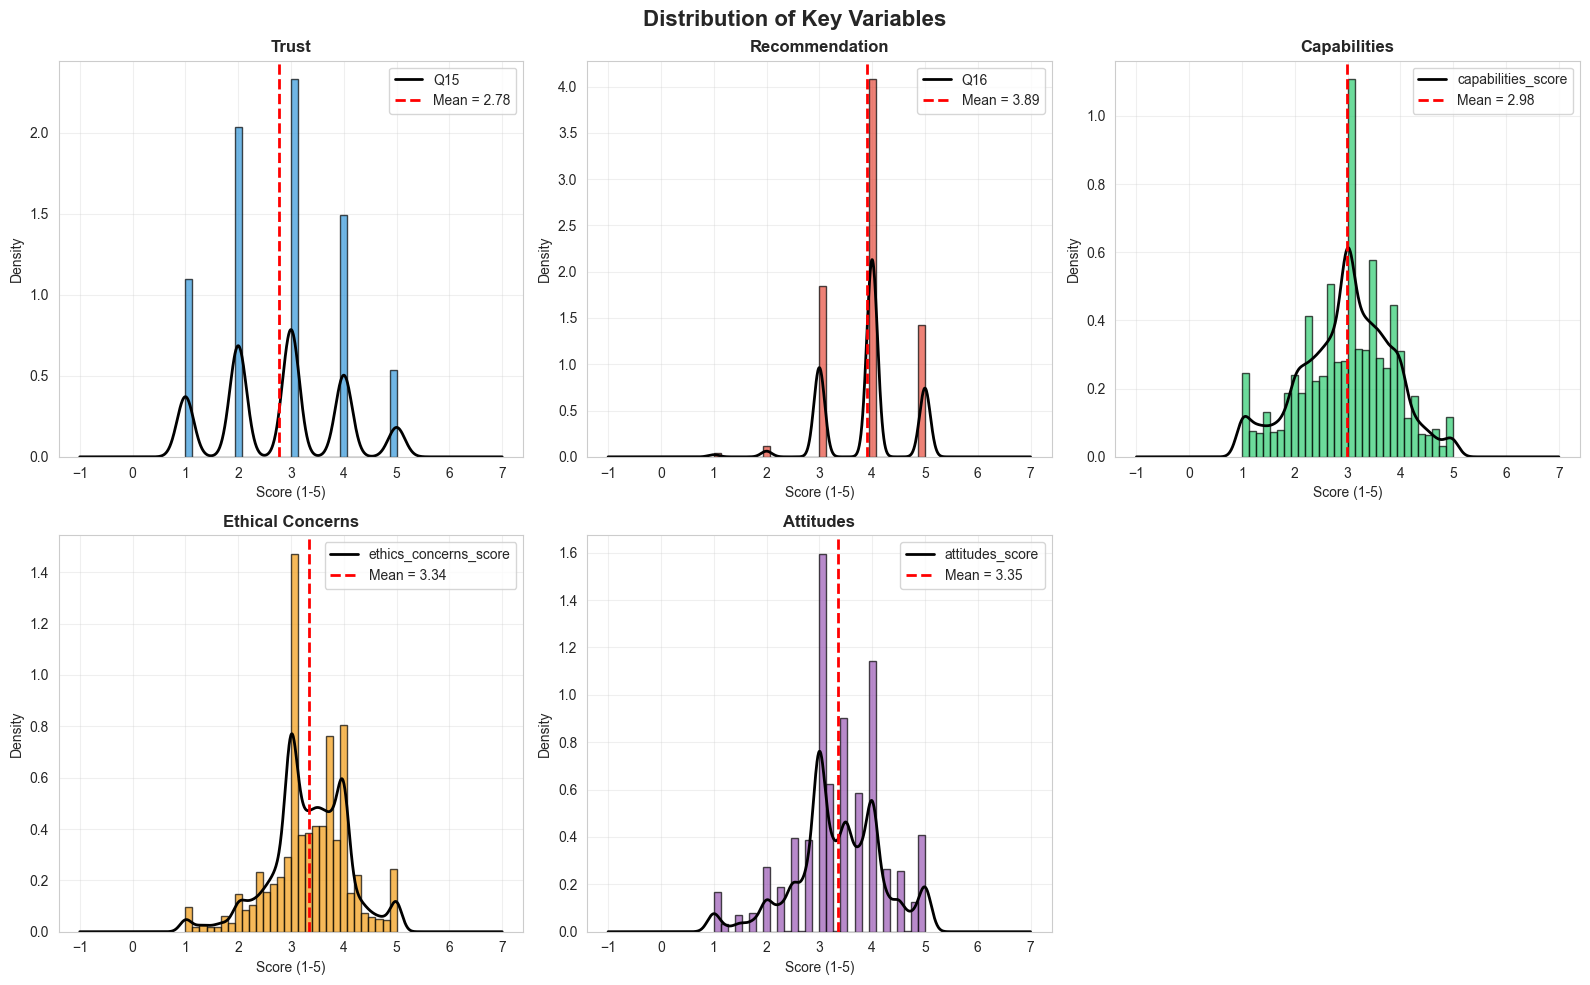

✅ Saved to results/figures/variable_distributions.png


In [24]:
# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

plot_vars = ['Q15', 'Q16', 'capabilities_score', 'ethics_concerns_score', 'attitudes_score']
titles = ['Trust', 'Recommendation', 'Capabilities', 'Ethical Concerns', 'Attitudes']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, (var, title, color) in enumerate(zip(plot_vars, titles, colors)):
    # Histogram
    axes[idx].hist(df[var].dropna(), bins=30, edgecolor='black', 
                  alpha=0.7, color=color, density=True)
    
    # KDE
    df[var].dropna().plot(kind='kde', ax=axes[idx], color='black', linewidth=2)
    
    # Mean line
    mean_val = df[var].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                     label=f'Mean = {mean_val:.2f}')
    
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Score (1-5)')
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

fig.delaxes(axes[5])

plt.suptitle('Distribution of Key Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(fig_dir / 'variable_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved to results/figures/variable_distributions.png")

In [26]:
print("\n" + "="*80)
print("STATISTICS BY USAGE FREQUENCY")
print("="*80)

for var, name in zip(summary_vars, ['Trust', 'Recommendation', 'Capabilities', 'Ethics', 'Attitudes']):
    print(f"\n{name}:")
    summary = df.groupby('usage_label')[var].agg(['count', 'mean', 'std'])
    print(summary.round(2))

# Save
usage_summary_full = df.groupby('usage_label')[summary_vars].agg(['mean', 'std', 'count'])
usage_summary_full.to_csv(output_dir / 'summary_by_usage.csv')
print("\n✅ Saved to results/tables/summary_by_usage.csv")


STATISTICS BY USAGE FREQUENCY

Trust:
             count  mean  std
usage_label                  
Daily        15123  2.76 1.13
Monthly        645  2.78 1.16
Weekly        3623  2.87 1.15

Recommendation:
             count  mean  std
usage_label                  
Daily        15132  3.89 0.73
Monthly        643  3.89 0.73
Weekly        3622  3.89 0.74

Capabilities:
             count  mean  std
usage_label                  
Daily        13936  2.94 0.87
Monthly        575  3.20 0.85
Weekly        3358  3.10 0.80

Ethics:
             count  mean  std
usage_label                  
Daily        12576  3.34 0.74
Monthly        513  3.33 0.78
Weekly        3079  3.32 0.76

Attitudes:
             count  mean  std
usage_label                  
Daily        13932  3.33 0.83
Monthly        577  3.64 0.93
Weekly        3361  3.40 0.87

✅ Saved to results/tables/summary_by_usage.csv


In [27]:
print("\n" + "="*80)
print("DESCRIPTIVE ANALYSIS COMPLETE")
print("="*80)
print(f"""
Sample: {len(df):,} students

Files Created:
✅ results/tables/summary_statistics.csv
✅ results/tables/usage_distribution.csv
✅ results/tables/summary_by_usage.csv
✅ results/figures/usage_distribution.png
✅ results/figures/variable_distributions.png

Next: Run 03_correlation_analysis.ipynb for RQ3
""")


DESCRIPTIVE ANALYSIS COMPLETE

Sample: 22,836 students

Files Created:
✅ results/tables/summary_statistics.csv
✅ results/tables/usage_distribution.csv
✅ results/tables/summary_by_usage.csv
✅ results/figures/usage_distribution.png
✅ results/figures/variable_distributions.png

Next: Run 03_correlation_analysis.ipynb for RQ3

